In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (14, 7)

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv"
df = pd.read_csv(url)

print(df.head())


   Rank       State Postal  Population
0     1     Alabama     AL   4849377.0
1     2      Alaska     AK    736732.0
2     3     Arizona     AZ   6731484.0
3     4    Arkansas     AR   2966369.0
4     5  California     CA  38802500.0


In [7]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load sample dataset (no upload needed)
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'Text': data.data})

# Display first 5 rows
print(df.head())

# TF-IDF vectorizer
tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.95,
    max_features=8000,
    stop_words='english'
)

# Fit and transform using correct column name
tfidf.fit(df['Text'])
text = tfidf.transform(df['Text'])

print("TF-IDF shape:", text.shape)


                                                Text
0  I was wondering if anyone out there could enli...
1  A fair number of brave souls who upgraded thei...
2  well folks, my mac plus finally gave up the gh...
3  \nDo you have Weitek's address/phone number?  ...
4  From article <C5owCB.n3p@world.std.com>, by to...
TF-IDF shape: (11314, 8000)


Fitting 2 clusters
Fitting 4 clusters
Fitting 6 clusters
Fitting 8 clusters
Fitting 10 clusters
Fitting 12 clusters
Fitting 14 clusters
Fitting 16 clusters
Fitting 18 clusters
Fitting 20 clusters


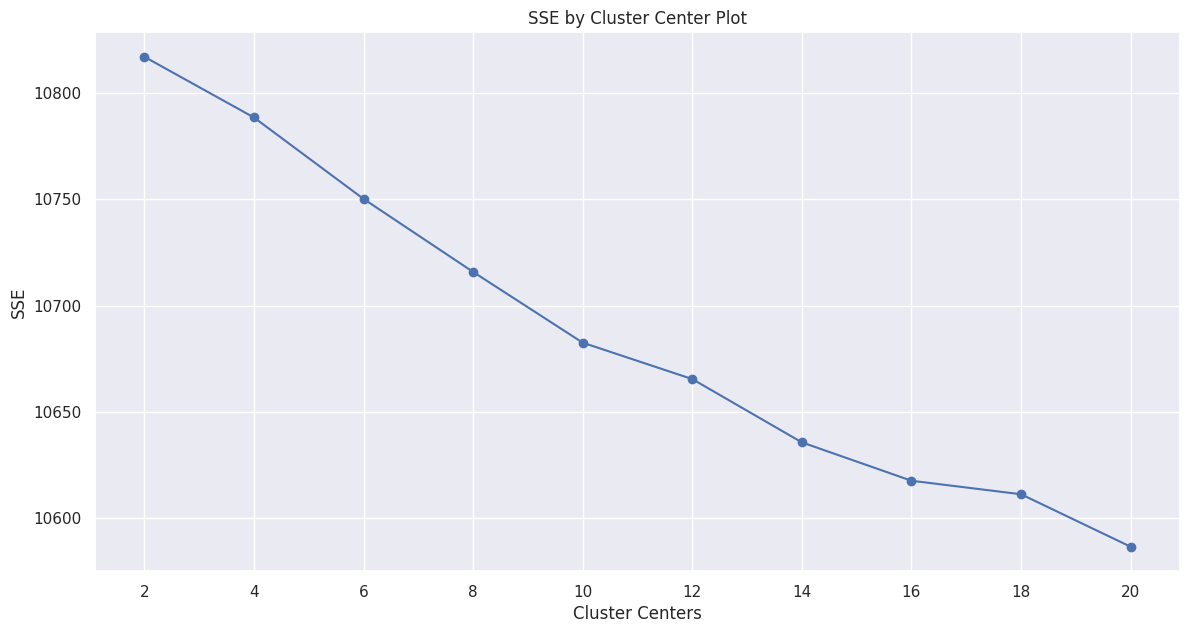

In [13]:
def generate_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fitting {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

generate_optimal_clusters(text, 20)

In [14]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

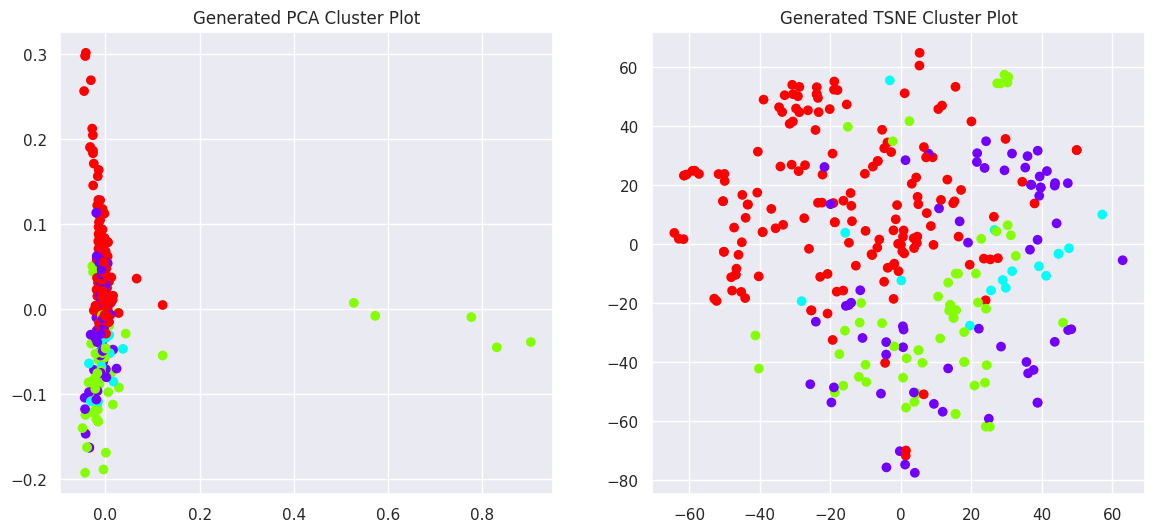

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

# assuming clusters is already defined as a list or array of cluster labels
clusters = np.array(clusters)

# number of clusters
max_label = clusters.max() + 1

# choose 3000 random samples
max_items = np.random.choice(range(text.shape[0]), size=3000, replace=True)

# PCA to 2D
pca = PCA(n_components=2).fit_transform(text[max_items, :].toarray())

# TSNE to 2D (using PCA to reduce dimension first)
tsne = TSNE(n_components=2, random_state=42).fit_transform(
    PCA(n_components=50).fit_transform(text[max_items, :].toarray())
)

# select 300 random points for plotting
idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)

# get cluster labels for selected points
label_subset = clusters[max_items][idx]

# color mapping
colors = [cm.hsv(i / max_label) for i in label_subset]

# Plot
f, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(pca[idx, 0], pca[idx, 1], c=colors)
ax[0].set_title('Generated PCA Cluster Plot')

ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=colors)
ax[1].set_title('Generated TSNE Cluster Plot')

plt.show()


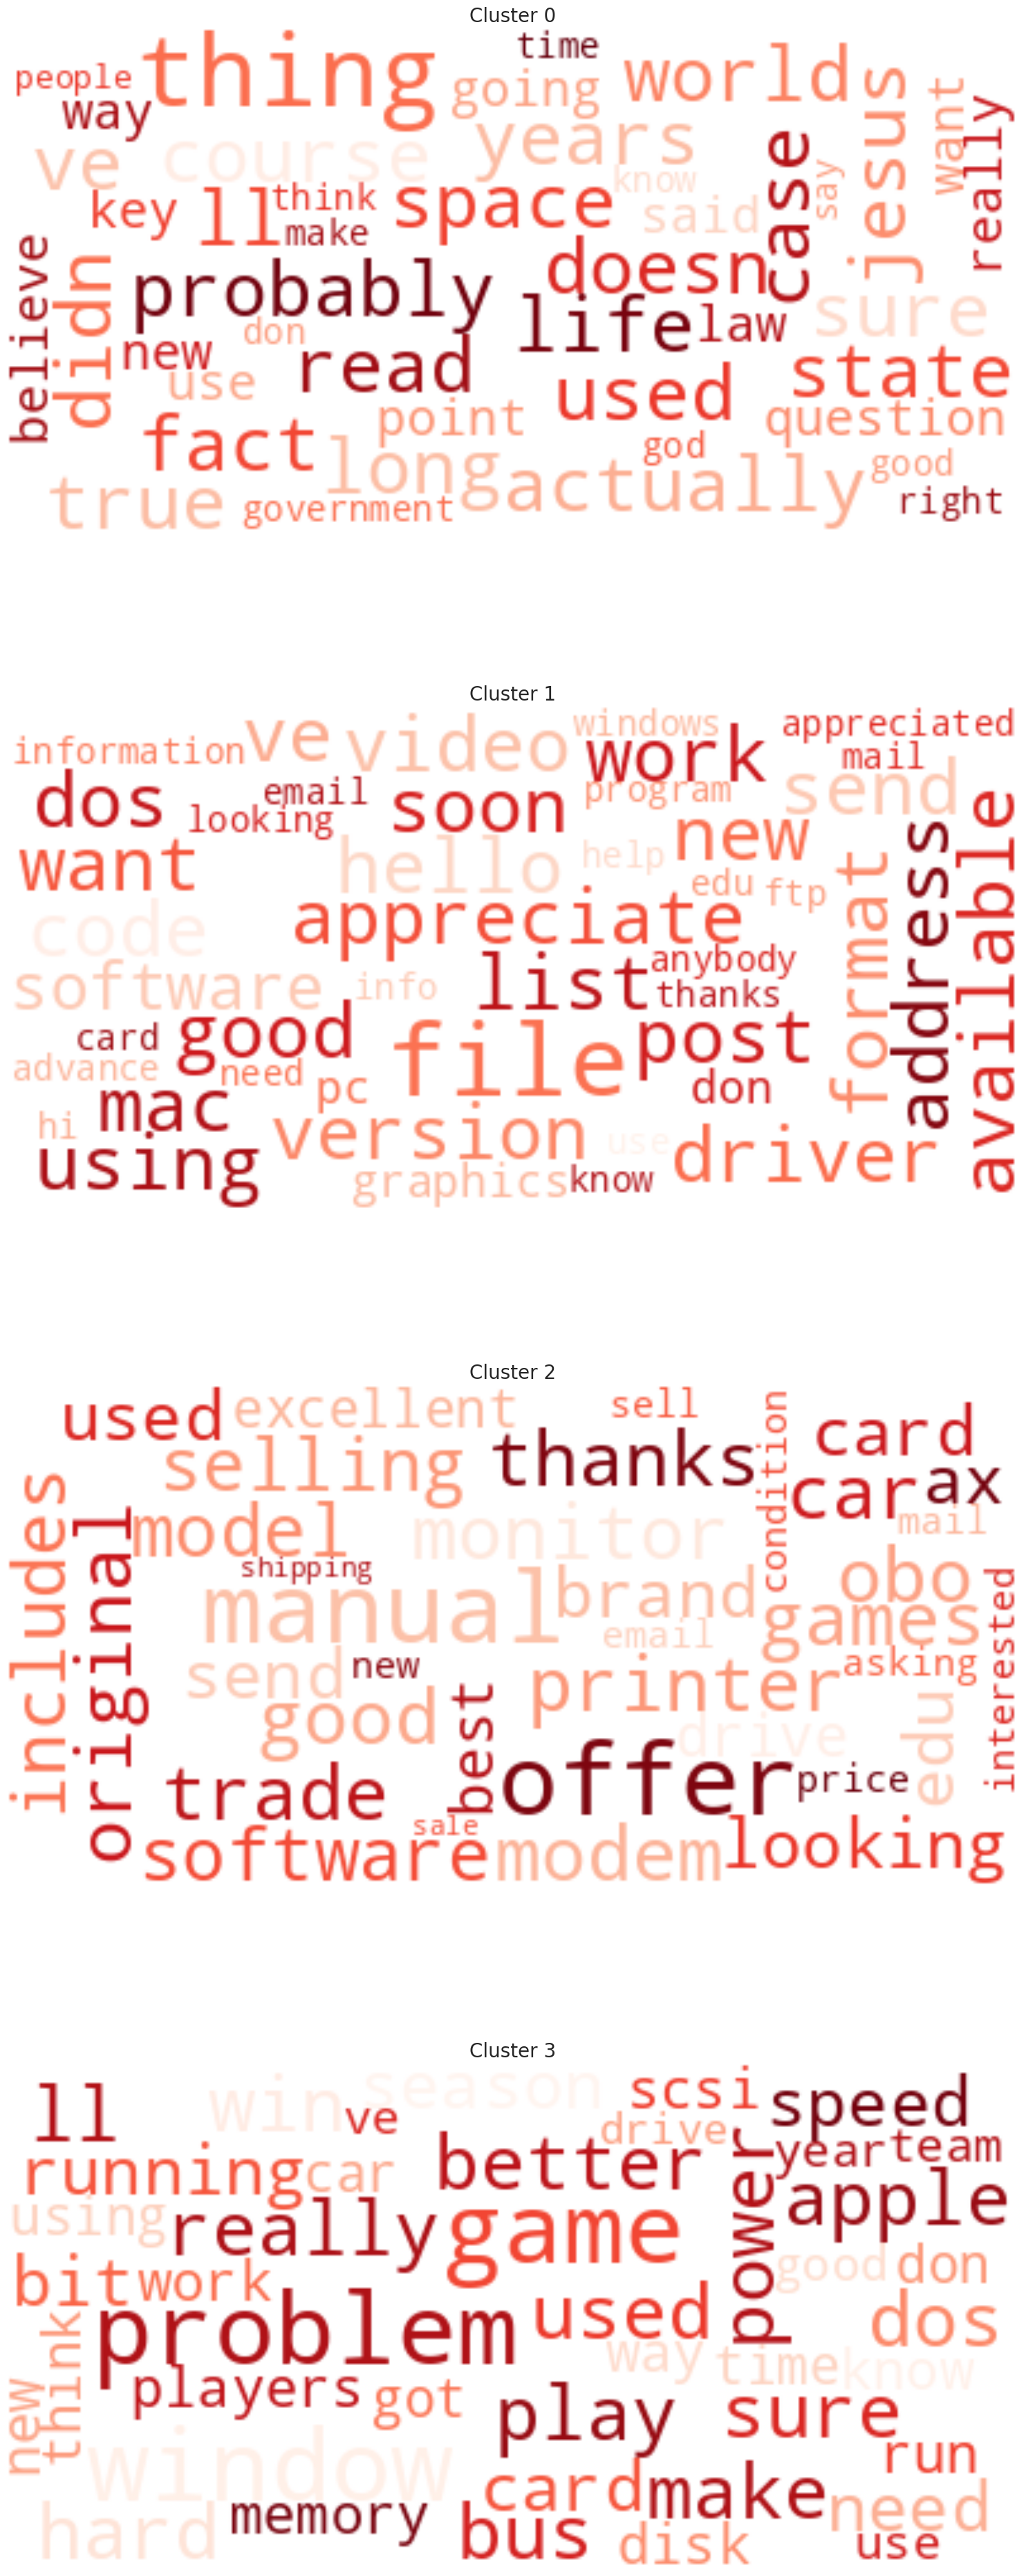

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---- Ensure clusters is numpy array ----
clusters = np.array(clusters)

# ---- Fix feature names (new method) ----
labels = tfidf.get_feature_names_out()

# ---- Function ----
def high_frequency_keywords(data, clusters, labels, n_terms):
    # mean vector for each cluster
    df = pd.DataFrame(data.toarray()).groupby(clusters).mean()

    # create subplots based on number of clusters
    n_clusters = len(df)
    fig, ax = plt.subplots(n_clusters, figsize=(15, 10 * n_clusters))

    for i, r in df.iterrows():
        words = ' '.join([labels[t] for t in np.argsort(r)[-n_terms:]])
        wordcloud = WordCloud(
            max_font_size=40,
            collocations=False,
            colormap='Reds',
            background_color='white'
        ).generate(words)

        ax[i].imshow(wordcloud, interpolation='bilinear')
        ax[i].set_title(f'Cluster {i}', fontsize=20)
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

# ---- Call function ----
high_frequency_keywords(text, clusters, labels, 50)
